In [16]:
import pandas as pd
from flags import FLAGS, unparsed
import numpy as np
from db.conn_db import db,cursor,engine,truncate_table,data_from_mysql,dev_id_train
import operator  
from functools import reduce
import logging
from sklearn.utils import shuffle


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.cross_validation import KFold
%matplotlib inline


/home/zhijiehuang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
logging.basicConfig(
    format='%(asctime)s - %(levelname)s - %(filename)s:%(lineno)d - %(message)s', level=logging.DEBUG)

In [18]:
deviceid_packages=pd.read_csv(FLAGS.file_path+'deviceid_packages.csv')

In [19]:
deviceid_brand=pd.read_csv(FLAGS.file_path+'deviceid_brand.csv')

In [20]:
deviceid_train=dev_id_train()

In [21]:
deviceid_train=pd.merge(deviceid_packages,deviceid_train,on=['device_id'],how='left') 
deviceid_train=pd.merge(deviceid_train,deviceid_brand,on=['device_id'],how='left') 

In [22]:
def data_ix(deviceid_train,class_n):
    
    filte=deviceid_train.n_class.values==class_n
    tmp_deviceid_train=deviceid_train.ix[filte,:]
    return tmp_deviceid_train

In [28]:
deviceid_train_1=data_ix(deviceid_train,1)

In [38]:
deviceid_train_1.loc[deviceid_train_1.brand.values=='2014811',:]

,app_id_list,device_id,age,sex,n_class,brand,type_no
65923,7ea40f20920105b4d5d69a867982186b|1896072db9ce6...,e80eee32391fd1ed9e0763e76cb77d62,1.0,1.0,1.0,2014811,2014811.HM2014811.2014811


In [36]:
deviceid_train_1.brand.unique()

array(['Sony', 'Xiaomi', 'OPPO', 'vivo', 'ZTE', 'Meizu', 'Huawei',
       'samsung', 'Lenovo', 'L36h', 'Coolpad', 'OYSIN', 'GiONEE',
       'HUAWEI', 'V615', 'Honor', 'X-apple', 'ONEPLUS', 'smartisan',
       'DOOV', 'L39h', 'Hisense', 'lge', 'MeiXing', 'SM-N9002', 'lephone',
       'IUNI', 'SOP', 'Che1-CL20', 'xiaolajiao', 'VEGA', 'MI+4LTE',
       'iPhone', 'YUSUN', 'VERIZON', 'Pioneer', 'htc', 'SM-C101', 'nubia',
       'bifer', 'MediaPad', 'ETON', 'XMSD', 'SUGAR', 'R8207', 'alps',
       'SM-N900', 'MI', 'Meitu', 'Amazon', 'm1', 'SCL23', 'SHOWN_P1',
       'CHM-UL00', 'TCL', 'MZT002-1', 'Philips', 'GT-N7100', '2014501',
       'UOOGOU', 'H60-L02', 'ivvi', 'KDDI', 'T1-A23L', 'SM-G7106', 'AND',
       'TETC', 'SKYHON', 'unknown', 'feixun', '2014811', '6607',
       'YotaPhone', 'Hasee', 'PE-UL00', 'OWWO'], dtype=object)

Text(0.5,0,'Count')

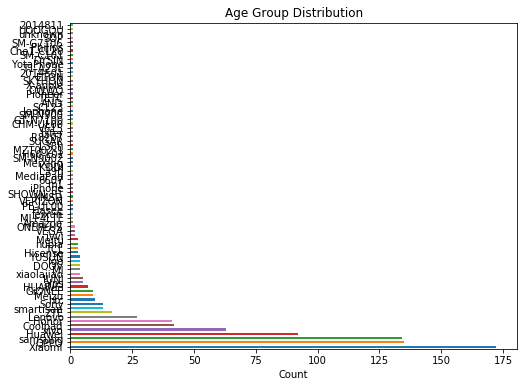

In [37]:


fig,ax = plt.subplots(figsize=(8,6))

deviceid_train_1.brand.value_counts().plot(kind='barh')
plt.title('Age Group Distribution')
plt.xlabel('Count')

